<a href="https://colab.research.google.com/github/Monikacg/Signal-Manipulation/blob/master/FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Syntetic signal analysis 

In [ ]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack

## Create signal

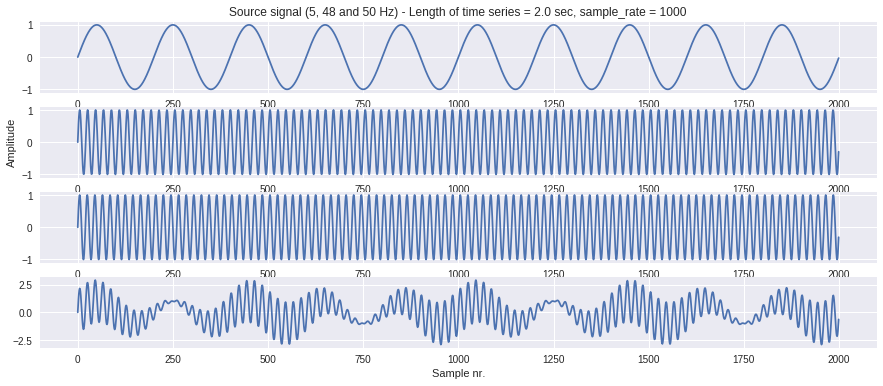

In [ ]:
f_s = 1000 # Sampling rate (measurements/sec)
signal_length = 2

f1 = 5
f2 = 48
f3 = 50

t = np.linspace(0, signal_length, 2*f_s, endpoint = False)
x1 = np.sin(f1* 2 * np.pi*  t)
x2 = np.sin(f2* 2 * np.pi*  t)
x3 = np.sin(f3* 2 * np.pi*  t)

# Compose signal 
x = x1 + x2 + x3

plt.figure(1)
plt.figure(figsize=(15,6))
plt.subplot(411)
plt.plot(x1)
plt.title("Source signal (5, 48 and 50 Hz) - Length of time series = {} sec, sample_rate = {}".format(len(x)/f_s, f_s))

plt.subplot(412)
plt.plot(x2)
plt.ylabel("Amplitude")

plt.subplot(413)
plt.plot(x3)

plt.subplot(414)
plt.plot(x)
plt.xlabel("Sample nr.")
plt.show()


## Apply DFT

(-50, 1100)

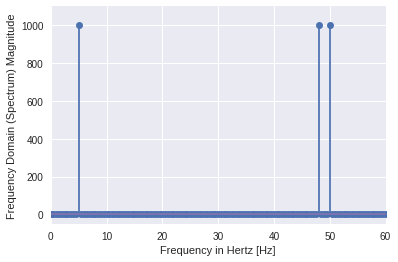

In [ ]:
X = fftpack.fft(x)

freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 60)
ax.set_ylim(-50, 1100)

# Add noise to signal

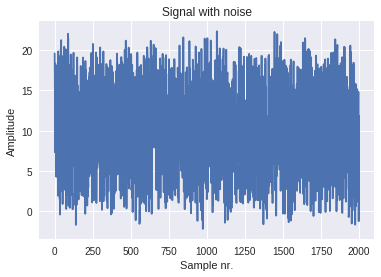

In [ ]:
import numpy as np
import random

sample = 2000
x1 = np.arange(sample)
noise = 0.01*np.asarray(random.sample(range(0,2000),sample))
 
y = x+noise

plt.plot(x1, y)
plt.title("Signal with noise")
plt.xlabel("Sample nr.")
plt.ylabel("Amplitude")
plt.show()

(-5, 1200)

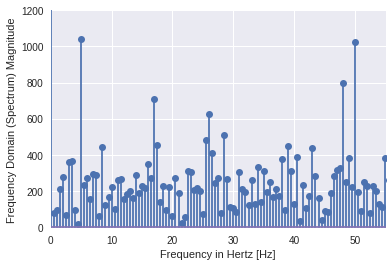

In [ ]:
X = fftpack.fft(y)
freqs = fftpack.fftfreq(len(y)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 55)
ax.set_ylim(-5, 1200)

# Hilbert Transform (HT)


(-200, 150.0)

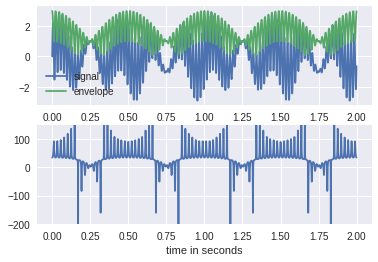

In [ ]:
from scipy.fftpack import fft,ifft
from scipy.signal import hilbert, chirp

signal = x
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)

instantaneous_phase = np.unwrap(np.angle(analytic_signal))

instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * f_s)

fig = plt.figure()

ax0 = fig.add_subplot(211)

ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()

ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(-200, 150.0)


## STFT

(-50, 1100)

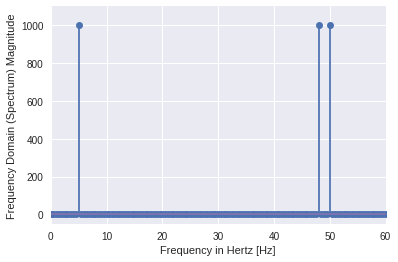

In [ ]:

#scipy.signal.stft

from scipy.fftpack import fft,ifft
from scipy.signal import hilbert, chirp, stft 

signal = x
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)

instantaneous_phase = np.unwrap(np.angle(analytic_signal))

instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * f_s)

fig = plt.figure()

ax0 = fig.add_subplot(211)

ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()

ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(-200, 150.0)